In [2]:
!pip install pandas

     |████████████████████████████████| 11.7 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 41.5 MB/s eta 0:00:01
     |████████████████████████████████| 15.8 MB 43.4 MB/s eta 0:00:01
     |████████████████████████████████| 247 kB 75.6 MB/s eta 0:00:01
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.


In [1]:
import pandas as pd

In [2]:
ds = pd.Series([1.0, 3.5, 4.6, 7.8])

In [3]:
ds

0    1.0
1    3.5
2    4.6
3    7.8
dtype: float64

In [4]:
ds[0]

1.0

In [5]:
import numpy as np

In [6]:
np.random.randn(10)

array([ 0.6193976 , -0.43738291, -0.34687977,  0.23278036,  1.1854454 ,
       -0.57256875,  1.75208346,  0.03556778, -0.16074252, -0.09515212])

In [7]:
np.random.randn(10)*5 + 25

array([32.85284154, 34.69530231, 24.97448679, 25.42965367, 15.79312401,
       38.68741594, 26.41131575, 25.77922713, 28.37656181, 21.26185979])

In [23]:
df = pd.DataFrame( {"names":["Jim", "Jane", "Alice", "Bob", "Ekman", "Munk", "Nansen", "Tharp", "McBoaty", "Earle"], "age":np.random.randn(10)*10 + 30, 
                    "weight":np.random.randn(10)*25 + 75, 
                    "university":["Unseen", "Gothenburg", "Lund", "Gothenburg", "Unseen", "Unseen", "Lund", "Gothenburg", "Unseen", "Unseen"]}, 
                   index=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"])

In [24]:
df

,names,age,weight,university
A,Jim,47.425632,79.776515,Unseen
B,Jane,28.790696,84.607519,Gothenburg
C,Alice,46.664267,98.229749,Lund
D,Bob,36.431604,75.653281,Gothenburg
E,Ekman,12.501152,57.270809,Unseen
F,Munk,42.582760,61.167606,Unseen
G,Nansen,5.901087,47.298684,Lund
H,Tharp,27.102784,88.148228,Gothenburg
I,McBoaty,15.753545,66.560149,Unseen
J,Earle,28.495888,86.756012,Unseen


In [12]:
df.columns

Index(['names', 'age', 'weight', 'university'], dtype='object')

In [13]:
df.index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')

In [14]:
df.loc[["A","J"]]

,names,age,weight,university
A,Jim,21.376938,69.470011,Unseen
J,Earle,19.753472,109.928688,Unseen


In [15]:
df.loc[["A","J"], "age"]

A    21.376938
J    19.753472
Name: age, dtype: float64

In [100]:
df.iloc[[0,9]]

,names,age,weight,university
A,Jim,17.862022,67.493954,Unseen
J,Earle,21.545533,58.897520,Unseen


#### Defining your own index, rather than the default index of 0...N may be useful when you need to organize data logically, for example time series data can use the time as index
But luckily, you also have access to the 0...N index by using the "iloc" selector

In [101]:
df["age"]

A    17.862022
B    35.003864
C    29.592639
D    23.850291
E    20.523645
F    12.605679
G    28.501036
H    28.712730
I    18.030605
J    21.545533
Name: age, dtype: float64

In [102]:
df["weight"].values # .values returns the column as an array

array([67.49395376, 73.67910343, 58.77356851, 61.07928818, 73.62034516,
       64.14601195, 60.17671149, 64.00341407, 66.15872038, 58.89751985])

In [103]:
df.describe()

,age,weight
count,10.000000,10.000000
mean,23.622805,64.802864
std,6.787897,5.509369
min,12.605679,58.773569
25%,18.653865,60.402356
50%,22.697912,64.074713
75%,28.659806,67.160145
max,35.003864,73.679103


In [25]:
df["university"].unique()

array(['Unseen', 'Gothenburg', 'Lund'], dtype=object)

In [18]:
sel_UU = (df["university"] == "Unseen")
df.loc[sel_UU] # You can use boolean selectors to select slices of the dataframe

,names,age,weight,university
A,Jim,21.376938,69.470011,Unseen
E,Ekman,24.981127,74.352229,Unseen
F,Munk,37.919609,48.666664,Unseen
I,McBoaty,38.578500,29.869296,Unseen
J,Earle,19.753472,109.928688,Unseen


In [26]:
df.groupby("university").count()

,names,age,weight
university,,,
Gothenburg,3,3,3
Lund,2,2,2
Unseen,5,5,5


In [27]:
df.groupby("university").mean()

,age,weight
university,,
Gothenburg,30.775028,82.803009
Lund,26.282677,72.764217
Unseen,29.351795,70.306218


In [28]:
df.groupby("university").std()

,age,weight
university,,
Gothenburg,4.970905,6.439962
Lund,28.823921,36.013702
Unseen,15.582933,12.527484


In [29]:
df.loc[df["age"] > 25]

,names,age,weight,university
A,Jim,47.425632,79.776515,Unseen
B,Jane,28.790696,84.607519,Gothenburg
C,Alice,46.664267,98.229749,Lund
D,Bob,36.431604,75.653281,Gothenburg
F,Munk,42.582760,61.167606,Unseen
H,Tharp,27.102784,88.148228,Gothenburg
J,Earle,28.495888,86.756012,Unseen


In [30]:
df.loc[df["age"] > 25, "names"]

A      Jim
B     Jane
C    Alice
D      Bob
F     Munk
H    Tharp
J    Earle
Name: names, dtype: object

In [31]:
df.loc[df["age"] > 25, "weight"] * 1.25

A     99.720644
B    105.759399
C    122.787186
D     94.566602
F     76.459507
H    110.185285
J    108.445016
Name: weight, dtype: float64

In [32]:
df.loc[df["age"] > 25, "weight"] = df.loc[df["age"] > 25, "weight"] * 1.25

In [33]:
df

,names,age,weight,university
A,Jim,47.425632,99.720644,Unseen
B,Jane,28.790696,105.759399,Gothenburg
C,Alice,46.664267,122.787186,Lund
D,Bob,36.431604,94.566602,Gothenburg
E,Ekman,12.501152,57.270809,Unseen
F,Munk,42.582760,76.459507,Unseen
G,Nansen,5.901087,47.298684,Lund
H,Tharp,27.102784,110.185285,Gothenburg
I,McBoaty,15.753545,66.560149,Unseen
J,Earle,28.495888,108.445016,Unseen


#### You can define your own functions and perform operations on grouped dataframes using "apply"

Let's say that a magical accident ages everyone at Unseen University by 25 years, we can update our dataframe by grouping it by "university" and then adding 25 years to the ages of those in UU.

In [34]:
def increase_age(gdf, addYears=25):
    if gdf.university[0] == "Unseen": # conditional statement to perform the operation only on Unseen University members
        gdf.loc[:, "age"] = gdf["age"] + addYears
    return gdf

In [35]:
df = df.groupby("university").apply(increase_age)

In [36]:
df

,names,age,weight,university
A,Jim,72.425632,99.720644,Unseen
B,Jane,28.790696,105.759399,Gothenburg
C,Alice,46.664267,122.787186,Lund
D,Bob,36.431604,94.566602,Gothenburg
E,Ekman,37.501152,57.270809,Unseen
F,Munk,67.582760,76.459507,Unseen
G,Nansen,5.901087,47.298684,Lund
H,Tharp,27.102784,110.185285,Gothenburg
I,McBoaty,40.753545,66.560149,Unseen
J,Earle,53.495888,108.445016,Unseen


In [123]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePathOrBuffer',
    sep=<no_default>,
    delimiter=None,
    header='infer',
    names=<no_default>,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=<no_default>,
    mangle_dupe_cols=True,
    dtype: 'DtypeArg | None' = None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: 'str' = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    encoding_errors: 'str | N

In [37]:
meop = pd.read_csv("ct4-9908-04_ODV.txt", skiprows=1, delimiter="\t", index_col=False)

In [38]:
meop

,Cruise,Station,Type,mon/day/yr,hh:mm,Longitude [degrees_east],Latitude [degrees_north],Depth [m],QF,Temperature [C],QF.1,Salinity [psu],QF.2
0,ct4-9908-04,1,C,06/11/2004,08:42,-122.899,37.203,5.0,0,11.8270,0,33.2968,0
1,ct4-9908-04,1,C,06/11/2004,08:42,-122.899,37.203,6.0,0,11.7647,0,33.3088,0
2,ct4-9908-04,1,C,06/11/2004,08:42,-122.899,37.203,7.0,0,11.7024,0,33.3208,0
3,ct4-9908-04,1,C,06/11/2004,08:42,-122.899,37.203,8.0,0,11.6401,0,33.3329,0
4,ct4-9908-04,1,C,06/11/2004,08:42,-122.899,37.203,9.0,0,11.5778,0,33.3449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111574,ct4-9908-04,260,C,09/25/2004,06:44,179.470,43.975,65.0,0,5.7521,0,NaN,1
111575,ct4-9908-04,260,C,09/25/2004,06:44,179.470,43.975,66.0,0,5.6333,0,NaN,1
111576,ct4-9908-04,260,C,09/25/2004,06:44,179.470,43.975,67.0,0,5.5146,0,NaN,1
111577,ct4-9908-04,260,C,09/25/2004,06:44,179.470,43.975,68.0,0,5.3959,0,NaN,1


In [45]:
meop.head(5)

,Cruise,Station,Type,LON,LAT,DEPTH,QF,TEMP,QF.1,SAL,QF.2,datetime
0,ct4-9908-04,1,C,-122.899,37.203,5.0,0,11.8270,0,33.2968,0,2004-06-11 08:42:00
1,ct4-9908-04,1,C,-122.899,37.203,6.0,0,11.7647,0,33.3088,0,2004-06-11 08:42:00
2,ct4-9908-04,1,C,-122.899,37.203,7.0,0,11.7024,0,33.3208,0,2004-06-11 08:42:00
3,ct4-9908-04,1,C,-122.899,37.203,8.0,0,11.6401,0,33.3329,0,2004-06-11 08:42:00
4,ct4-9908-04,1,C,-122.899,37.203,9.0,0,11.5778,0,33.3449,0,2004-06-11 08:42:00


In [46]:
meop.tail(5)

,Cruise,Station,Type,LON,LAT,DEPTH,QF,TEMP,QF.1,SAL,QF.2,datetime
111574,ct4-9908-04,260,C,179.47,43.975,65.0,0,5.7521,0,NaN,1,2004-09-25 06:44:00
111575,ct4-9908-04,260,C,179.47,43.975,66.0,0,5.6333,0,NaN,1,2004-09-25 06:44:00
111576,ct4-9908-04,260,C,179.47,43.975,67.0,0,5.5146,0,NaN,1,2004-09-25 06:44:00
111577,ct4-9908-04,260,C,179.47,43.975,68.0,0,5.3959,0,NaN,1,2004-09-25 06:44:00
111578,ct4-9908-04,260,C,179.47,43.975,69.0,0,5.2772,0,NaN,1,2004-09-25 06:44:00


In [39]:
meop["mon/day/yr"]+ " "+ meop["hh:mm"]

0         06/11/2004 08:42
1         06/11/2004 08:42
2         06/11/2004 08:42
3         06/11/2004 08:42
4         06/11/2004 08:42
                ...       
111574    09/25/2004 06:44
111575    09/25/2004 06:44
111576    09/25/2004 06:44
111577    09/25/2004 06:44
111578    09/25/2004 06:44
Length: 111579, dtype: object

In [40]:
meop["datetime"] = pd.to_datetime(meop["mon/day/yr"]+ " "+ meop["hh:mm"])

In [41]:
del(meop["mon/day/yr"], meop["hh:mm"])

In [42]:
meop

,Cruise,Station,Type,Longitude [degrees_east],Latitude [degrees_north],Depth [m],QF,Temperature [C],QF.1,Salinity [psu],QF.2,datetime
0,ct4-9908-04,1,C,-122.899,37.203,5.0,0,11.8270,0,33.2968,0,2004-06-11 08:42:00
1,ct4-9908-04,1,C,-122.899,37.203,6.0,0,11.7647,0,33.3088,0,2004-06-11 08:42:00
2,ct4-9908-04,1,C,-122.899,37.203,7.0,0,11.7024,0,33.3208,0,2004-06-11 08:42:00
3,ct4-9908-04,1,C,-122.899,37.203,8.0,0,11.6401,0,33.3329,0,2004-06-11 08:42:00
4,ct4-9908-04,1,C,-122.899,37.203,9.0,0,11.5778,0,33.3449,0,2004-06-11 08:42:00
...,...,...,...,...,...,...,...,...,...,...,...,...
111574,ct4-9908-04,260,C,179.470,43.975,65.0,0,5.7521,0,NaN,1,2004-09-25 06:44:00
111575,ct4-9908-04,260,C,179.470,43.975,66.0,0,5.6333,0,NaN,1,2004-09-25 06:44:00
111576,ct4-9908-04,260,C,179.470,43.975,67.0,0,5.5146,0,NaN,1,2004-09-25 06:44:00
111577,ct4-9908-04,260,C,179.470,43.975,68.0,0,5.3959,0,NaN,1,2004-09-25 06:44:00


In [43]:
meop = meop.rename(columns={"Temperature [C]":"TEMP", "Salinity [psu]":"SAL", "Longitude [degrees_east]":"LON", "Latitude [degrees_north]":"LAT", "Depth [m]":"DEPTH"})

In [44]:
meop["Cruise"].unique()

array(['ct4-9908-04'], dtype=object)

In [167]:
meop.TEMP

0         11.8270
1         11.7647
2         11.7024
3         11.6401
4         11.5778
           ...   
111574     5.7521
111575     5.6333
111576     5.5146
111577     5.3959
111578     5.2772
Name: TEMP, Length: 111579, dtype: float64

<AxesSubplot:>

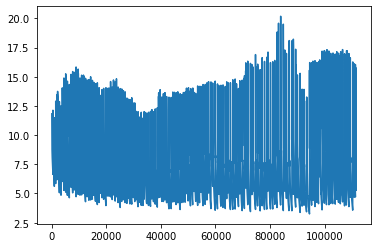

In [168]:
meop.TEMP.plot()

In [170]:
import matplotlib.pyplot as plt

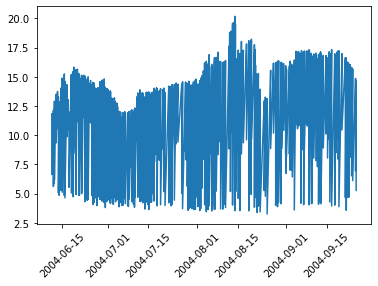

In [186]:
plt.plot(meop.datetime, meop.TEMP)
plt.xticks(rotation=45);

Text(0, 0.5, 'Depth (m)')

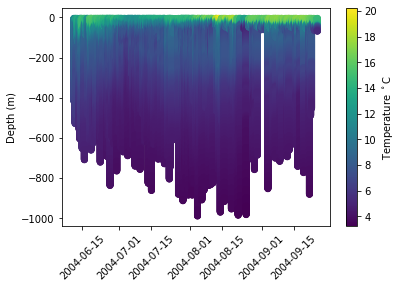

In [188]:
SC = plt.scatter(meop.datetime, -meop.DEPTH, c=meop.TEMP)
cbar = plt.colorbar(SC)
cbar.set_label("Temperature $^\circ$C") # label accepts Latex math code
plt.xticks(rotation=45); #semicolon suppresses any output to display
plt.ylabel("Depth (m)");

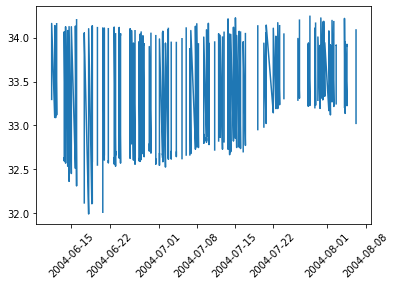

In [187]:
plt.plot(meop.datetime, meop.SAL)
plt.xticks(rotation=45);

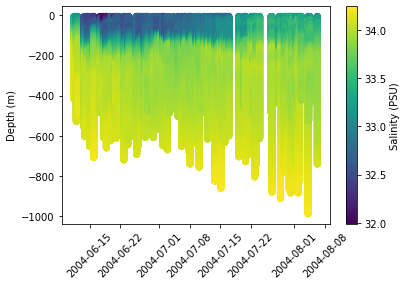

In [189]:
SC = plt.scatter(meop.datetime, -meop.DEPTH, c=meop.SAL)
cbar = plt.colorbar(SC)
cbar.set_label("Salinity (PSU)") # label accepts Latex math code
plt.xticks(rotation=45); #semicolon suppresses any output to display
plt.ylabel("Depth (m)");

In [177]:
meop.groupby(pd.cut(meop.DEPTH, np.arange(0, 501, 20) ))[["TEMP", "SAL"]].mean()

,TEMP,SAL
DEPTH,,
"(0, 20]",14.544797,32.883507
"(20, 40]",12.257952,32.972518
"(40, 60]",9.658846,33.015781
"(60, 80]",8.638373,33.025808
"(80, 100]",8.314889,33.095594
"(100, 120]",8.026588,33.252810
"(120, 140]",7.825808,33.471260
"(140, 160]",7.713707,33.658581
"(160, 180]",7.595852,33.771994
